In [204]:
#==================================================
# Library Import
#==================================================

import math
import argparse
import numpy as np
import pandas as pd
import scipy
from tqdm.notebook import tqdm
import scipy.io

import torch
import torch.autograd as autograd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.lines as mlines
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [206]:
num = 16
bin_idx = np.arange(num-1)

dfs_np = [0,0,0,0,0,0,0,0,0,0]
for ith in range(10):
    dfs_np[ith] = np.zeros([1, 2])

for ith in range(10):    
    for jth in range(100):
        ps_ij = predictives_cmp[jth,:,ith].numpy()
        hist = np.histogram(ps_ij, bins=np.arange(num))[0]
        dfs_np[ith] = np.r_[dfs_np[ith], np.c_[bin_idx, hist]]
    dfs_np[ith] = np.delete(dfs_np[ith], 0, 0)
    
dfs_cmp = [0,0,0,0,0,0,0,0,0,0]
for ith in range(10):
    dfs_cmp[ith] = pd.DataFrame(dfs_np[ith])
    dfs_cmp[ith].columns = ["index", "count"]

In [207]:
num = 16
bin_idx = np.arange(num-1)

dfs_np = [0,0,0,0,0,0,0,0,0,0]
for ith in range(10):
    dfs_np[ith] = np.zeros([1, 2])

for ith in range(10):    
    for jth in range(100):
        ps_ij = predictives_pgm[jth,:,ith].numpy()
        hist = np.histogram(ps_ij, bins=np.arange(num))[0]
        dfs_np[ith] = np.r_[dfs_np[ith], np.c_[bin_idx, hist]]
    dfs_np[ith] = np.delete(dfs_np[ith], 0, 0)
    
dfs_pgm = [0,0,0,0,0,0,0,0,0,0]
for ith in range(10):
    dfs_pgm[ith] = pd.DataFrame(dfs_np[ith])
    dfs_pgm[ith].columns = ["index", "count"]

In [208]:
num = 16
bin_idx = np.arange(num-1)

dfs_np = [0,0,0,0,0,0,0,0,0,0]

for ith in range(10):
    ps_ij = data[:,ith]
    hist = np.histogram(ps_ij, bins=np.arange(num))[0]
    dfs_np[ith] = np.c_[bin_idx, hist]
    
dfs_data = [0,0,0,0,0,0,0,0,0,0]
for ith in range(10):
    dfs_data[ith] = pd.DataFrame(dfs_np[ith])
    dfs_data[ith].columns = ["index", "count"]

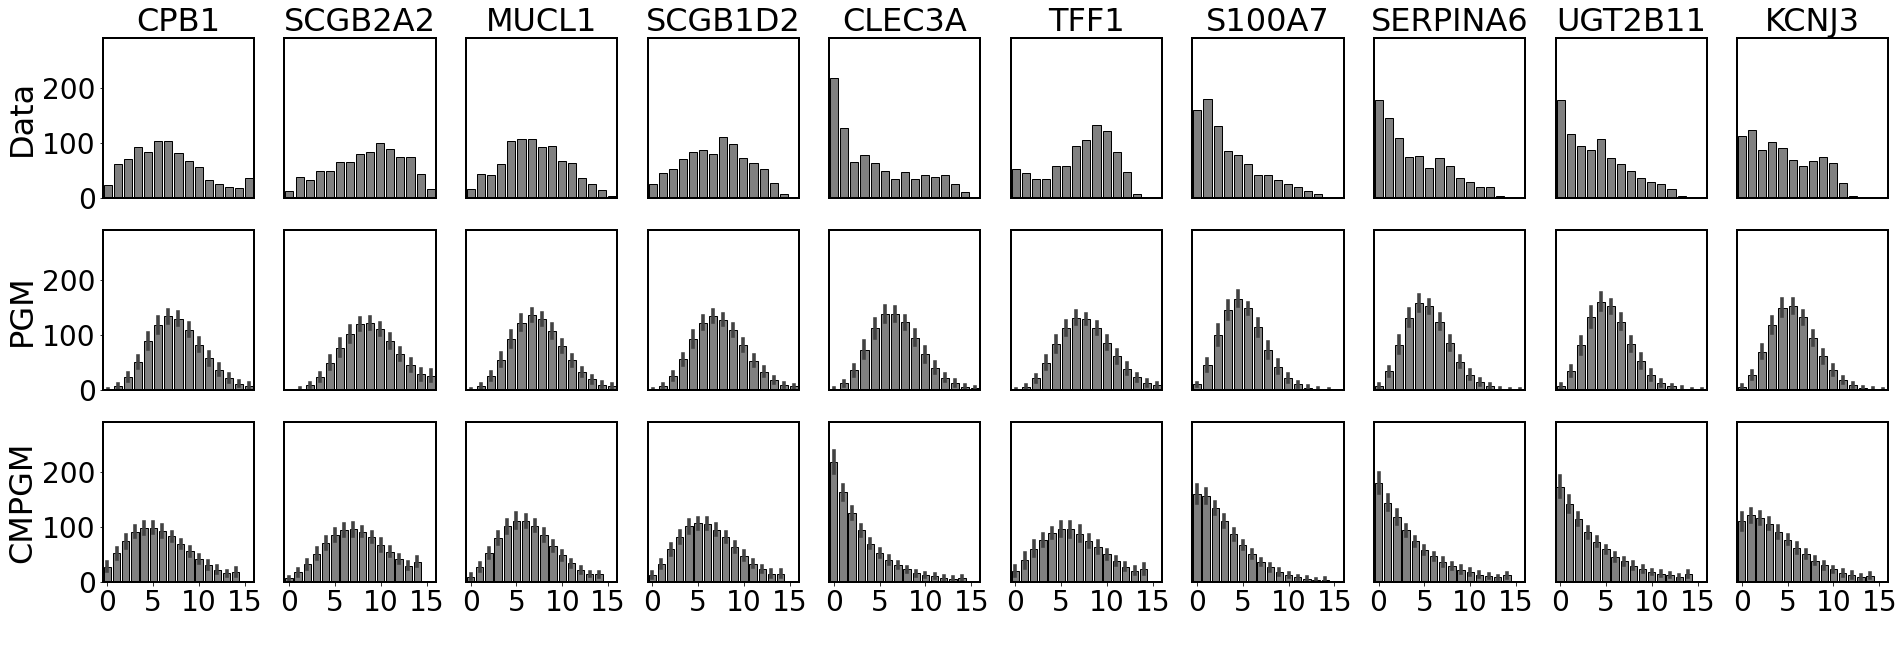

In [209]:
def ax_setting(ax, i, j):
    mpl.rcParams["lines.linewidth"] = 2.0
    
    framewidth = 2.0
    ax.spines["top"].set_linewidth(framewidth)
    ax.spines["left"].set_linewidth(framewidth)
    ax.spines["right"].set_linewidth(framewidth)
    ax.spines["bottom"].set_linewidth(framewidth)
    
    ax.xaxis.set_major_locator(plt.MultipleLocator(5))
    ax.yaxis.set_major_locator(plt.MultipleLocator(100))
    #ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%1.2f'))
    ax.tick_params(axis='x', labelsize=28)
    ax.tick_params(axis='y', labelsize=28)
    
    ax.set_xlim(-0.5,16)
    ax.set_ylim(0,290)
    ax.set_xlabel(r" ", fontsize=32)
    
    if i != 2:
        ax.set_xticks([])        

    if j != 0:
        ax.set_yticks([])
        
    if i == 0:
        ax.set_title(labels[j][0][0], fontsize=32)        
        
    
    
xmax = 16
ymax = 16
bins = np.arange(0, xmax+1, 1) - 0.5

def plot(sample, ax):
    sns.barplot(x="index", y="count", data=sample, color="gray", ci="sd", edgecolor="black", ax=ax)
    
fig, axs = plt.subplots(3, 10, figsize=(32,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
for j in range(10):
    ax_setting(axs[0][j], 0, j)
    #sns.histplot(df_data.loc[:,j], color="gray", bins=bins, ax=axs[0][j], label="test")
    plot(dfs_data[j], axs[0][j])
    axs[0][j].set_xticks([])
    axs[0][j].set_xticklabels([])
    axs[0][j].set_xlabel(r" ", fontsize=32)
    if j != 0:
        axs[0][j].set_ylabel(r" ", fontsize=32)
    else:
        axs[0][j].set_ylabel(r"Data", fontsize=32)
    
for j in range(10):
    ax_setting(axs[1][j], 1, j)
    plot(dfs_pgm[j], axs[1][j])
    axs[1][j].set_xticks([])
    axs[1][j].set_xticklabels([])
    axs[1][j].set_xlabel(r" ", fontsize=32)
    if j != 0:
        axs[1][j].set_ylabel(r" ", fontsize=32)
    else:
        axs[1][j].set_ylabel(r"PGM", fontsize=32)
    
for j in range(10):
    ax_setting(axs[2][j], 2, j)
    plot(dfs_cmp[j], axs[2][j])
    axs[2][j].set_xticks([0, 5, 10, 15, 20])
    axs[2][j].set_xticklabels(["0", "5", "10", "15", "20"])
    axs[2][j].set_xlim(-0.5, 16)
    axs[2][j].set_xlabel(r" ", fontsize=32)
    if j != 0:
        axs[2][j].set_ylabel(r" ", fontsize=32)
    else:
        axs[2][j].set_ylabel(r"CMPGM", fontsize=32)
    
fig.savefig('../Fig/figure_a.eps', format='eps')


In [161]:
betas = [0, 0]
betas[0] = np.load("./CMPGM_FDBayes_beta_lyd.npy").tolist()
betas[1] = np.load("./CMPGM_FDBayes_beta_opt.npy").tolist()

df = pd.DataFrame({'type':["Lyddon et al."]*10+["Ours"]*10, 'beta':betas[0]+betas[1]})
df1 = pd.DataFrame({'type':["Lyddon et al."]*10, 'beta':betas[0]})
df2 = pd.DataFrame({'type':["Ours"]*10, 'beta':betas[1]})

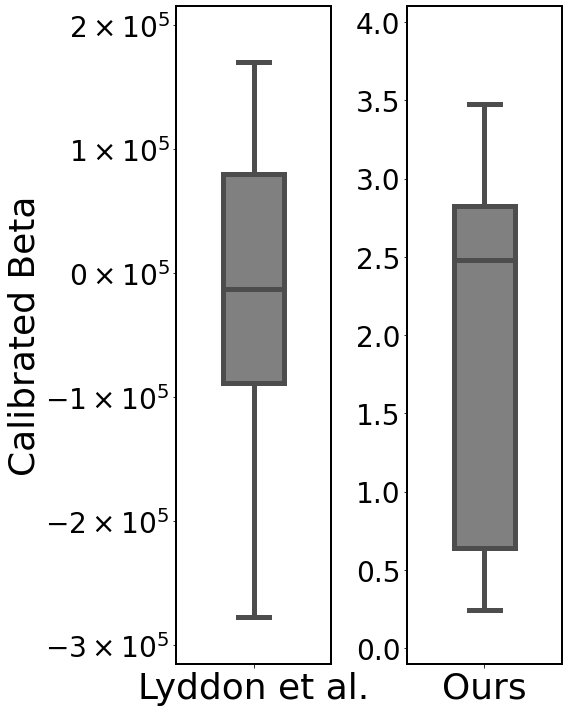

In [163]:
def ax_setting_1(ax):
    mpl.rcParams["lines.linewidth"] = 2.0
    
    framewidth = 2.0
    ax.spines["top"].set_linewidth(framewidth)
    ax.spines["left"].set_linewidth(framewidth)
    ax.spines["right"].set_linewidth(framewidth)
    ax.spines["bottom"].set_linewidth(framewidth)
    
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter(r'$%.0e$'))
    ax.tick_params(axis='x', labelsize=28)
    ax.tick_params(axis='y', labelsize=24)
    
    ax.set_ylim(-315000, 215000)
    ax.set_xticklabels([], fontsize=36)
    ax.set_xlabel("", fontsize=34)
    ax.set_ylabel(r"Calibrated Beta $\beta_*$", fontsize=32)

    
def ax_setting_2(ax):
    mpl.rcParams["lines.linewidth"] = 2.0
    
    framewidth = 2.0
    ax.spines["top"].set_linewidth(framewidth)
    ax.spines["left"].set_linewidth(framewidth)
    ax.spines["right"].set_linewidth(framewidth)
    ax.spines["bottom"].set_linewidth(framewidth)
    
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%1.1f'))
    ax.tick_params(axis='x', labelsize=28)
    ax.tick_params(axis='y', labelsize=28)
    
    ax.set_ylim(-0.1, 4.1)
    ax.set_xticklabels([], fontsize=36)
    ax.set_xlabel("", fontsize=34)
    ax.set_ylabel(r"Calibrated Beta $\beta_*$", fontsize=32)


fig, axs = plt.subplots(1, 2, figsize=(8, 10))
ax_setting_1(axs[0])
sns.boxplot(x="type", y="beta", data=df1, color="gray", width=0.4, linewidth=5, ax=axs[0])
axs[0].set(xlabel=None)
axs[0].set_yticks([-300000, -200000, -100000, 0, 100000, 200000])
axs[0].set_yticklabels([r"$-3 \times 10^5$", r"$-2 \times 10^5$", r"$-1 \times 10^5$", r"$0 \times 10^5$", r"$1 \times 10^5$", r"$2 \times 10^5$"], fontsize=28)
axs[0].set_ylabel(r"Calibrated Beta", fontsize=36)

ax_setting_2(axs[1])
sns.boxplot(x="type", y="beta", data=df2, color="gray", width=0.4, linewidth=5, ax=axs[1])
axs[1].set(xlabel=None)
axs[1].set(ylabel=None)

fig.tight_layout()
fig.show()

fig.savefig('../Fig/figure_10.eps', format='eps')